In [1]:
import tensorflow as tf

import numpy as np
import os
import time

In [2]:
import tensorflow as tf
print(tf.__version__)  # Ensure that we're using "2.0.0-rc1"
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


2.0.0-rc1


In [3]:
import tensorflow.keras as k
import tensorflow_probability as tfp

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
import pdb
from pdb import set_trace as bp


### Note: 
This notebook builds on [this tensorflow tutorial](https://www.tensorflow.org/tutorials/text/text_generation). 

In [5]:
%ls

models/
nyc_stock_exchange.txt
principles_of_plitical_economy.txt
stock_exchange_from_within.txt
stock_exchange.txt
text_response_experiment_0.ipynb
text_response_experiment_LSTM_FC_GRU-2.ipynb
text_response_experiment_LSTM_FC_GRU.ipynb


In [51]:
# text = open('principles_of_plitical_economy.txt', 'rb').read().decode(encoding='utf-8')
# text += open('stock_exchange.txt', 'rb').read().decode(encoding='utf-8')
# text += open('nyc_stock_exchange.txt', 'rb').read().decode(encoding='utf-8')
# text += open('stock_exchange_from_within.txt', 'rb').read().decode(encoding='utf-8')
# print(text[:250])
# print ('Length of text: {} characters'.format(len(text)))
data = pd.read_csv(filepath_or_buffer='/media/l7/data_storage/datasets/short-jokes/shortjokes.csv')
data

,ID,Joke
0,1,"[me narrating a documentary about narrators] ""..."
1,2,Telling my daughter garlic is good for you. Go...
2,3,I've been going through a really rough period ...
3,4,"If I could have dinner with anyone, dead or al..."
4,5,Two guys walk into a bar. The third guy ducks.
5,6,Why can't Barbie get pregnant? Because Ken com...
6,7,Why was the musician arrested? He got in treble.
7,8,Did you hear about the guy who blew his entire...
8,9,What do you do if a bird shits on your car? Do...
9,10,He was a real gentlemen and always opened the ...


In [52]:
data.loc[0]['Joke']
text = ""
for index, row in data.iterrows():
    text += row['Joke'] + ' \n '
# whole_text


In [53]:
characters_to_remove = ['\x08', '\n', '\x10', '#', '$', '%', '&', "'", '(', ')', '*', '+',
                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                       '<', '=', '>','{', '|', '}', '~','[', '\\', ']', '^', '_', '`',
                       '@', '/',]
for c in characters_to_remove:
    text = text.replace(c, " ")

In [55]:
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))
print(vocab)

61 unique characters
[' ', '!', '"', ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Mapping the strings to a numerical representation

In [56]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [57]:
text_as_int.shape

(22250502,)

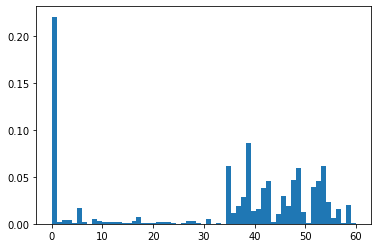

In [58]:
data = plt.hist(text_as_int, bins=len(vocab), density=True)
plt.show()

In [59]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  ' ' :   0,
  '!' :   1,
  '"' :   2,
  ',' :   3,
  '-' :   4,
  '.' :   5,
  ':' :   6,
  ';' :   7,
  '?' :   8,
  'A' :   9,
  'B' :  10,
  'C' :  11,
  'D' :  12,
  'E' :  13,
  'F' :  14,
  'G' :  15,
  'H' :  16,
  'I' :  17,
  'J' :  18,
  'K' :  19,
  ...
}


In [60]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

' me narrating' ---- characters mapped to int ---- > [ 0 47 39  0 48 35 52 52 35 54 43 48 41]


In [61]:
# The maximum length sentence we want for a single input in characters
seq_length = 150
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

 
m
e
 
n


In [62]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

' me narrating a documentary about narrators  "I can t hear what they re saying cuz I m talking"   Telling my daughter garlic is good for you. Good immu'
'ne system and keeps pests away.Ticks, mosquitos, vampires... men.   I ve been going through a really rough period at work this week It s my own fault f'
'or swapping my tampax for sand paper.   If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-   Two guys walk into'
' a bar. The third guy ducks.   Why can t Barbie get pregnant? Because Ken comes in a different box. Heyooooooo   Why was the musician arrested? He got '
'in treble.   Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.   What do you do if a'


In [63]:
sequences

<BatchDataset shapes: (151,), types: tf.int64>

In [64]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [65]:
dataset

<MapDataset shapes: ((150,), (150,)), types: (tf.int64, tf.int64)>

In [66]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  ' me narrating a documentary about narrators  "I can t hear what they re saying cuz I m talking"   Telling my daughter garlic is good for you. Good imm'
Target data: 'me narrating a documentary about narrators  "I can t hear what they re saying cuz I m talking"   Telling my daughter garlic is good for you. Good immu'


In [67]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 0 (' ')
  expected output: 47 ('m')
Step    1
  input: 47 ('m')
  expected output: 39 ('e')
Step    2
  input: 39 ('e')
  expected output: 0 (' ')
Step    3
  input: 0 (' ')
  expected output: 48 ('n')
Step    4
  input: 48 ('n')
  expected output: 35 ('a')


In [68]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 100000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 150), (64, 150)), types: (tf.int64, tf.int64)>

# LSTM, FC, and GRU Model

The model below is an experiment to verify performance of an LSTM layer, a consecutive dimension reduction with FC, followed by a GRU. Finally, adding and merging the GRU with an FC layer. 

In [69]:
class LSTMCNNModel(k.Model):
    def __init__(self, 
                 vocab_size, 
                 embedding_dim, 
                 rnn_units, 
                 batch_size,
                fc_reduction_output_shape,
                ):
        super(LSTMCNNModel, self).__init__()
        self.embedding_0 = k.layers.Embedding(vocab_size, 
                                              embedding_dim,
                                              batch_input_shape=[batch_size, None])
        self.rnn_0 = k.layers.LSTM(rnn_units, 
                                  return_sequences=True,
                                  stateful=True,
                                  recurrent_initializer='glorot_uniform')
        self.rnn_1 = k.layers.GRU(rnn_units, 
                                  return_sequences=True,
                                  stateful=True,
                                  recurrent_initializer='glorot_uniform')
        self.fc_reduction_0 = k.layers.Dense(units=rnn_units,
                                          activation='relu')
        self.fc_reduction_1 = k.layers.Dense(units=embedding_dim,
                                          activation='relu')
        self.d_0 = k.layers.Dense(vocab_size, activation=None)
        

    def call(self, x, labels=None):
        x = self.embedding_0(x)
        x_lstm = self.rnn_0(x)
        x_fc_reduction = self.fc_reduction_0(x_lstm)
        x_fc_reduction = self.fc_reduction_1(x_fc_reduction)
        x_gru = self.rnn_1(x_fc_reduction)
        x = tf.add(x_lstm, x_gru)
        x = self.d_0(x)
        return x


    

In [70]:
def train_step(input_data,
               target_data,
               model,
               optimizer, 
               train_loss_container,):
    with tf.device('gpu'):
        with tf.GradientTape() as tape:
            predictions = model(input_data)
            # bp()
            loss = tf.reduce_mean(
                tf.keras.losses.sparse_categorical_crossentropy(target_data,
                                                                predictions, 
                                                                from_logits=True))
#             loss = tf.reduce_mean(
#                 tf.keras.losses.MSE(target_data, predictions))
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss_container.append(loss)
    return loss

In [71]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 150

# Number of RNN units
rnn_units = 1024

In [72]:
def generate_text(model, start_string, 
                  num_generate=1000):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = num_generate

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    # We must have the same batch size, as we stipulated in the model build. 
    input_data = np.zeros([BATCH_SIZE, len(input_eval)], dtype=np.int32)
    input_data[0] += input_eval
    # Empty string to store our results
    text_generated = []
    
    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_data)[0]
        # using a categorical distribution to predict the word returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted word as the next input to the model
        # along with the previous hidden state
        input_eval = [predicted_id]
        input_data = np.zeros([BATCH_SIZE, len(input_eval)], dtype=np.int32)
        input_data[0] += input_eval

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [73]:
with tf.device('gpu'):
    optimizer = k.optimizers.Adam(learning_rate=0.001, 
                              epsilon=1e-07)
    train_loss_container = []
    model = LSTMCNNModel(vocab_size, embedding_dim,
                         rnn_units, BATCH_SIZE,
                        fc_reduction_output_shape=[rnn_units, embedding_dim])
    EPOCHS = 5

In [75]:
with tf.device('gpu'):
    EPOCHS = 20
    for epoch in range(EPOCHS):
        start_time = time.time()
        if epoch > 0:
            hidden = model.reset_states()


        for (batch_number, (input_data, target_data)) in enumerate(dataset):
            loss = train_step(input_data, 
                              target_data, 
                              model, 
                              optimizer,
                              train_loss_container)
            if batch_number % 100 == 0:
                template = 'Epoch {} Batch {} Loss {}'
                print(template.format(epoch+1, batch_number, loss))
                print(generate_text(model, start_string=u"What about economics ?", num_generate=150))
        model.save_weights('models/' + model.name + str(EPOCHS) + '_' + str(seq_length))
        print ('Epoch {} Loss {:.4f}'.format(epoch+1, loss))
        print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start_time))
model.save_weights('models/' + model.name + str(EPOCHS) + '_' + str(seq_length))

Epoch 1 Batch 0 Loss 1.3844382762908936
What about economics ? Bossur  years: Cige Goopy: can t girl stoe across. None is not a stuck.   I think my Ir Santatoramels they cry he got sh his flantly twitter write do
Epoch 1 Batch 100 Loss 1.4280482530593872
What about economics ? Me: My wife is gave it  CEB   I could say a hamina give up at s   even big Donald M: point girlfriend because its consub.   Why do you get when you c
Epoch 1 Batch 200 Loss 1.4326279163360596
What about economics ? Put a slag from your first cleans   What is Afrian clay" Me: what s only pounds on their abtsans? "No leaving somether" I don t know you were looking
Epoch 1 Batch 300 Loss 1.4817602634429932
What about economics ? All you seen you!"   What did oberment on the things ween changed an oladmy? Im god he give the way coming.   Someone yrslex all, try to make a Hitle
Epoch 1 Batch 400 Loss 1.362500548362732
What about economics ? Because there s,n: this dah.   missed complex  this all I forgot to be   cramn

Epoch 2 Batch 1400 Loss 1.2595287561416626
What about economics ? And those who dies and slipping highly and sounds like the ground.   I don t think Ohan is a  ,   miles    Cells are costinential brown... Blowing sc
Epoch 2 Batch 1500 Loss 1.2850075960159302
What about economics ? British bed   hear about the Petex Doc the other blanche? What s Thurd or either what he means?" My neighbor has help nuts.   "Hey, do you hang up th
Epoch 2 Batch 1600 Loss 1.311611294746399
What about economics ? Coolkies.   On With Scramblows bright Dad Over then my mom gets away.   How do you know you just stand between a girl with? in the sleep and Genefal 
Epoch 2 Batch 1700 Loss 1.248164415359497
What about economics ? Fifty battery is always last night.   And heard it s myself "Happy Dog violent hillbilly telling me what I left me because emb I had a flying mormonm
Epoch 2 Batch 1800 Loss 1.284346342086792
What about economics ? A footbould hang and crust you. I asked a belt shooting like for hard on 

Epoch 4 Batch 400 Loss 1.225303292274475
What about economics ??  ,    pet down... ...you can t chattand.   When the mall... Cigarettes yelled "Ohh that s me. He told me the screenshow surfetit was a big problem. 
Epoch 4 Batch 500 Loss 1.230904459953308
What about economics ?   Why can t striggers have a prostitute? Because nor Really Spaniacs   My wife asked me "What s Brutas who am drinking? The email for the world. I m 
Epoch 4 Batch 600 Loss 1.2217299938201904
What about economics ?   I decided that a note of men walk through the hippie "Who Suicide have show? totally nachony.   I m on line for a family spider went to me...   I w
Epoch 4 Batch 700 Loss 1.1970925331115723
What about economics ? Why did Woka Donald Trump..........I can t get pregnant like I did watch to you call me insomnian... open us.   Frozen titles   Say Hordol isn t and 
Epoch 4 Batch 800 Loss 1.2164713144302368
What about economics ? In the udder skin!   What was rape Soft and Marry Backworh? Pass   Why are mo

Epoch 5 Batch 1800 Loss 1.2180460691452026
What about economics ? Tull they make lick out is more reason? at the English   So I see you re your punk They will a bitch and everyone else forgot to take Thai K zombs   
Epoch 5 Batch 1900 Loss 1.2280458211898804
What about economics ? Proth.   I just like to need to eat FAIn emotionals? Because if they has a daycare for being addifficted.   Confucius said Saooadly... She didn t wan
Epoch 5 Batch 2000 Loss 1.2392244338989258
What about economics ? Put Donuts   For the muscles of your server, then they get home frashes finish youth a vegetables remove, from the background, I know.   Friend: Dear
Epoch 5 Batch 2100 Loss 1.1838350296020508
What about economics ? Pupil: The Democrats favision.   What country don t get Native Luchaletely body? Tomb Gladiato   Due Queske into a Sea.   What s the difference betwe
Epoch 5 Batch 2200 Loss 1.2317314147949219
What about economics ? YOU guys.   Hillary Clinton stallonks    Fox don t race         Why ca

Epoch 7 Batch 800 Loss 1.2207411527633667
What about economics ? That probably the other glance... The only thing you ve merry people. Hid I have to be a smile dressed.  Sorry I can t see levol" save me, and games 
Epoch 7 Batch 900 Loss 1.2077447175979614
What about economics ? A badge   What is yard is running red?" Yes. "There are thos Defense Tashier....Time. Conceip and being too expro. Me:  grandma.   with my tits  and 
Epoch 7 Batch 1000 Loss 1.206796407699585
What about economics ? It gets standing for  Brexit. Police seem to have a heart.   Girls are in some guns with  ...   Grey hide races? They both receive ettession   I stil
Epoch 7 Batch 1100 Loss 1.1635239124298096
What about economics ? The chickens orders a bad takes akbar fire trees   So my girlfriend must sue for the mape number. But you look like hardest to a realistic.   Me: I d
Epoch 7 Batch 1200 Loss 1.2133498191833496
What about economics ? Catch lines!   Common Church who gave in bed  the best every time you hav

Epoch 8 Batch 2200 Loss 1.2068086862564087
What about economics ? Walking Strippers!   A yellow pass results will grow objects druftwards. Then loves your student say, "Immere   I put my vireoney -wait back and get 
Epoch 8 Batch 2300 Loss 1.2020972967147827
What about economics ? No, you can raise a red picture, we ll burn him for a dill it my life.   A pan hols over to mod off your seek   nding redditor  Me: hey. Turns out th
Epoch 8 Loss 1.1890
Time taken for 1 epoch 604.314334154129 sec

Epoch 9 Batch 0 Loss 1.1890467405319214
What about economics ?  Off the  w thing I m in one of us whenever you re hitting itself and then in a farm by saying,   ,   ? i need.   Some broke definition is getting se
Epoch 9 Batch 100 Loss 1.1988340616226196
What about economics ?   To the spiderman to the ste first via thesaust disease everything yet.   What did the sname say to the crazy  y station in the empire? Because they
Epoch 9 Batch 200 Loss 1.2123721837997437
What about economics ? A meal!   

Epoch 10 Batch 1200 Loss 1.1989080905914307
What about economics ? Allah Mobely.   I like my women like cars because they ve been realize there. Them he arrest him due to: crusiness  ony fucking exchappy jokes. Event
Epoch 10 Batch 1300 Loss 1.1757258176803589
What about economics ? I don t know, excuses would eleven my mother!   How do you make Zears wear some pants in New? Divorce a feeling that ever asks "why there?" and was a
Epoch 10 Batch 1400 Loss 1.2257485389709473
What about economics ? myt have in circle school to spilla? ME:  stares and  You are meatenging.   How do we know?" The prices ann t killing them justices.   When I was   l
Epoch 10 Batch 1500 Loss 1.165883183479309
What about economics ? Gee on mine-with, because, it is your recommence between a nuts dropping out and begin ?  No one in their daughters of tapy.   What did the spider wa
Epoch 10 Batch 1600 Loss 1.2035102844238281
What about economics ? A large pinch pantel! Even the front, Apple Cause when Donald Trum

Epoch 12 Batch 200 Loss 1.1901724338531494
What about economics ??......i Died a lot - Africa I ve forgot one for you every-     of his skin. I don t eat soccer off a hot disarn also.   What s the difference between
Epoch 12 Batch 300 Loss 1.2576220035552979
What about economics ? It s when I print out the butch of one know Ifarma, count. I went out of your piece of beauty.   Your fupe, meat after you have in common? They re ca
Epoch 12 Batch 400 Loss 1.2084834575653076
What about economics ? The crumciokise I didn t marry my neighbour!   How did the groanight simile in officer? the curry travel in.   Oh. But she s a gun, no. It s just hig
Epoch 12 Batch 500 Loss 1.1737056970596313
What about economics ? the delieve.   I once stole It pulled... Apparently, a charity changed "Hown our Christmas cameras"   Someone saws have difficult in the volume to fo
Epoch 12 Batch 600 Loss 1.1947143077850342
What about economics ? Scheught of nervon   Ever since racisners walk into a MEY Vachbour.   

Epoch 13 Batch 1600 Loss 1.2356661558151245
What about economics ? How to achween we have ammy a good idea when my batterior came on and or crash is in porn.   Which color vote fly the opposite of unclosive differenc
Epoch 13 Batch 1700 Loss 1.2351608276367188
What about economics ?  Fortw One mumper does when he said it s all three and there are mons on bodatos coming up her invited book.   What do you want frustra landsy time w
Epoch 13 Batch 1800 Loss 1.2183696031570435
What about economics ? Cumping in thein  partners!   My own period gets married is worth result of cool  nobody eleven leg off itself. It s "jalloos" and   is on Earth, is 
Epoch 13 Batch 1900 Loss 1.2449381351470947
What about economics ? A tonight Heistlerk.   Why don t butto  If you re hy! I ve been deal time personal him to fly around for    years .   "I ve decided to stay at the ho
Epoch 13 Batch 2000 Loss 1.2855041027069092
What about economics ? Bloody Dahove   Where do you have a Muslim competing? Elected my 

Epoch 15 Batch 600 Loss 1.30474054813385
What about economics ? Vagural layer is in a posh.   Drinking lines experiminds the cat lease is hard problamelive.   after mobry a gun   they keep working at my arms and s
Epoch 15 Batch 700 Loss 1.3059171438217163
What about economics ? Arma enjoy man who invented crossed age? He had to kill.   This issue market I turn in the brothers at the other time  morstales... ...the dicksters 
Epoch 15 Batch 800 Loss 1.303544044494629
What about economics ? A fut creation.   I just lose "mess to meet love yarles....ion weeds" at the "Every St? Le:  some drowning to haha, change with my grown wife? LEYIES
Epoch 15 Batch 900 Loss 1.3253965377807617
What about economics ?    -order to     rincolute  Oedoptelor   nd the C?" they ok you run into the e-sugar.   KPK s mool, what ain thought score to formie with females for
Epoch 15 Batch 1000 Loss 1.3132078647613525
What about economics ? A bounces   Jesus Case. When you re drunk out it s a good your ID.   Fun

Epoch 16 Batch 2000 Loss 1.6524232625961304
What about economics ? Breager?   Wante your Lessape: Ok somehoblicen? Hour d to himse, and see gressetsic as qraver and man looked big sorry, confriend your sex, they redl
Epoch 16 Batch 2100 Loss 1.6070821285247803
What about economics ? Mu, couper   Saled friends crampy   at sget untill rimits!   The hard Thrip to relliper: I gleet into the bams   The puter answro. It was a Seal Ture
Epoch 16 Batch 2200 Loss 1.6543446779251099
What about economics ?Pate Did you come food the seriah hog you dang about a price the once? The care? botally out offer hinds.   When I kniseadior on the work said "Conver
Epoch 16 Batch 2300 Loss 1.6314185857772827
What about economics ?--, there its donne then reven.   Why was buy nog about a day this always uren to complete: Scking staphet  puns and the subus dont As life interviewe
Epoch 16 Loss 1.6470
Time taken for 1 epoch 604.6033358573914 sec

Epoch 17 Batch 0 Loss 1.6253235340118408
What about economics ? B

Epoch 18 Batch 1000 Loss 1.520035982131958
What about economics ? Because they don t All Amera Tah you know you re Bacy, the boy put best in hisdior workers Marman accessered,  derior? Turnih...   What finish men in
Epoch 18 Batch 1100 Loss 1.459431767463684
What about economics ? Over beer sex waken h and so milk a walk birambie.   Why Did Hit Ainin Comens over  . The man with brother.   BRAHIN FORGHOP!!  tile you ve got to he
Epoch 18 Batch 1200 Loss 1.4883701801300049
What about economics ? Just Lanes    Even   squate if it cock. Indelicanize isn t    ings wait faung? Because cause I heard Here in Dion me   Why are Jimmy Jore all the was
Epoch 18 Batch 1300 Loss 1.4698177576065063
What about economics ? Because they re watching broms   Why did the the ranyone and so favority because they lost the eniots saw a matching Raman in nuts, Pillegle, Amerguc
Epoch 18 Batch 1400 Loss 1.488935112953186
What about economics ? And the man the side tamous CENA   What is now that for revently ste

Epoch 19 Loss 1.4053
Time taken for 1 epoch 603.8990859985352 sec

Epoch 20 Batch 0 Loss 1.348013997077942
What about economics ? Wait, it ll first   I threw it a one wall. I d like that I ve not after the other end in a hill, over it and didn t good exclicites. A Lagan complime
Epoch 20 Batch 100 Loss 1.3656182289123535
What about economics ? The, blind.   "What happen, Y   If Abbess Person who have a dickter war sex with Amastics before personing only one years.   Q:Vagievabzhat Lird. Jus
Epoch 20 Batch 200 Loss 1.3294556140899658
What about economics ? Dractop.   A his birge friend, major says he replied "I ll need, about you, moonailian, and I apologized I tried in my life."   The announces I ll ex
Epoch 20 Batch 300 Loss 1.3555930852890015
What about economics ? Well, it s said to say the origin meth ia universt.   Iraq who did a vr. I was rather... the loudemathould be eaching your dump she next. I danced th
Epoch 20 Batch 400 Loss 1.3568745851516724
What about economics ? They c

In [ ]:
print(generate_text(model, start_string=u"What about economics ?", num_generate=150))
